In [11]:
# ! pip install matplotlib

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import plotly.express as px
from datetime import timedelta, datetime
warnings.filterwarnings('ignore')
# % matplotlib inline

In [2]:
df_test = pd.read_csv("data_for_dash.csv")
df_full = pd.read_csv("data_for_dash_full.csv")

In [3]:
df_test.head()

,ACTIVITY_DATE,MEDIA_BUYER,CAMPAIGN,SPEND,REVENUE,DAILY_PROFIT,TOTAL_PROFIT,DAILY_RETURN,TOTAL_RETURN,LANDER_ARRIVALS,SERP_ARRIVALS,AD_CLICKS,ACCEPTED_CLICKS,ACCEPTANCE_RATE,SPEND_PER_ARRIVAL,REVENUE_PER_ARRIVAL,PROFIT_PER_ARRIVAL
0,2023-11-01,Tom,TG_Oct3_Thai_Vacation_packages_BL,103.0896,74.13,-28.9596,-28.9596,-0.280917,-0.280917,12814,3685,3692,1997.0,0.540899,0.008045,0.005785,-0.002260
1,2023-11-02,Tom,TG_Oct3_Thai_Vacation_packages_BL,100.5130,80.29,-20.2230,-49.1826,-0.201198,-0.482115,15175,4144,3668,2155.0,0.587514,0.006624,0.005291,-0.001333
2,2023-11-03,Tom,TG_Oct3_Thai_Vacation_packages_BL,100.8974,82.45,-18.4474,-67.6300,-0.182833,-0.664948,16191,3968,3677,2030.0,0.552081,0.006232,0.005092,-0.001139
3,2023-11-04,Tom,TG_Oct3_Thai_Vacation_packages_BL,99.7021,73.65,-26.0521,-93.6821,-0.261299,-0.926247,12711,3598,4722,2006.0,0.424820,0.007844,0.005794,-0.002050
4,2023-11-05,Tom,TG_Oct3_Thai_Vacation_packages_BL,99.9932,71.87,-28.1232,-121.8053,-0.281251,-1.207498,13937,3791,4304,1867.0,0.433783,0.007175,0.005157,-0.002018


In [4]:
df_full.head()

,ACTIVITY_DATE,MEDIA_BUYER,CAMPAIGN,SPEND,REVENUE,DAILY_PROFIT,TOTAL_PROFIT,DAILY_RETURN,TOTAL_RETURN,LANDER_ARRIVALS,SERP_ARRIVALS,AD_CLICKS,ACCEPTED_CLICKS,ACCEPTANCE_RATE,SPEND_PER_ARRIVAL,REVENUE_PER_ARRIVAL,PROFIT_PER_ARRIVAL
0,2023-09-01,Luke,LH_HairTransplant_VT_0411,5.39,11.28,5.89,5.89,1.092764,1.092764,132,102,0,91.0,inf,0.040833,0.085455,0.044621
1,2023-09-02,Luke,LH_HairTransplant_VT_0411,8.97,14.09,5.12,11.01,0.570792,1.663556,192,129,0,100.0,inf,0.046719,0.073385,0.026667
2,2023-09-03,Luke,LH_HairTransplant_VT_0411,8.19,12.51,4.32,15.33,0.527473,2.191028,201,133,0,99.0,inf,0.040746,0.062239,0.021493
3,2023-09-04,Luke,LH_HairTransplant_VT_0411,6.07,11.47,5.40,20.73,0.889621,3.080650,164,108,0,80.0,inf,0.037012,0.069939,0.032927
4,2023-09-05,Luke,LH_HairTransplant_VT_0411,4.58,10.81,6.23,26.96,1.360262,4.440912,131,93,0,72.0,inf,0.034962,0.082519,0.047557


In [5]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ACTIVITY_DATE        100 non-null    object 
 1   MEDIA_BUYER          100 non-null    object 
 2   CAMPAIGN             100 non-null    object 
 3   SPEND                100 non-null    float64
 4   REVENUE              100 non-null    float64
 5   DAILY_PROFIT         100 non-null    float64
 6   TOTAL_PROFIT         100 non-null    float64
 7   DAILY_RETURN         100 non-null    float64
 8   TOTAL_RETURN         100 non-null    float64
 9   LANDER_ARRIVALS      100 non-null    int64  
 10  SERP_ARRIVALS        100 non-null    int64  
 11  AD_CLICKS            100 non-null    int64  
 12  ACCEPTED_CLICKS      100 non-null    float64
 13  ACCEPTANCE_RATE      100 non-null    float64
 14  SPEND_PER_ARRIVAL    100 non-null    float64
 15  REVENUE_PER_ARRIVAL  100 non-null    floa

In [6]:
df_test['ACTIVITY_DATE'] = pd.to_datetime(df_test['ACTIVITY_DATE'], format="%Y-%m-%d")
df_full['ACTIVITY_DATE'] = pd.to_datetime(df_full['ACTIVITY_DATE'], format="%Y-%m-%d")

In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ACTIVITY_DATE        100 non-null    datetime64[ns]
 1   MEDIA_BUYER          100 non-null    object        
 2   CAMPAIGN             100 non-null    object        
 3   SPEND                100 non-null    float64       
 4   REVENUE              100 non-null    float64       
 5   DAILY_PROFIT         100 non-null    float64       
 6   TOTAL_PROFIT         100 non-null    float64       
 7   DAILY_RETURN         100 non-null    float64       
 8   TOTAL_RETURN         100 non-null    float64       
 9   LANDER_ARRIVALS      100 non-null    int64         
 10  SERP_ARRIVALS        100 non-null    int64         
 11  AD_CLICKS            100 non-null    int64         
 12  ACCEPTED_CLICKS      100 non-null    float64       
 13  ACCEPTANCE_RATE      100 non-null   

In [8]:
end_date = df_full['ACTIVITY_DATE'].max()
# str(end_date).split(' ')[0]
end_date

Timestamp('2023-11-09 00:00:00')

In [9]:
from datetime import timedelta

def roll_back_days(most_recent_date, days_to_roll_back):
   

    # Calculate the rolled-back date
    rolled_back_date = most_recent_date - timedelta(days=days_to_roll_back)

    return rolled_back_date

In [10]:
start_date = roll_back_days(end_date, 7)
start_date

Timestamp('2023-11-02 00:00:00')

In [11]:
# df_date = df[df["ACTIVITY_DATE"].between

In [15]:
df_date = df_full[(df_full['ACTIVITY_DATE'] >= start_date) & (df_full['ACTIVITY_DATE'] <= end_date)]

In [16]:
df_date.head()

,ACTIVITY_DATE,MEDIA_BUYER,CAMPAIGN,SPEND,REVENUE,DAILY_PROFIT,TOTAL_PROFIT,DAILY_RETURN,TOTAL_RETURN,LANDER_ARRIVALS,SERP_ARRIVALS,AD_CLICKS,ACCEPTED_CLICKS,ACCEPTANCE_RATE,SPEND_PER_ARRIVAL,REVENUE_PER_ARRIVAL,PROFIT_PER_ARRIVAL
192,2023-11-02,Alice,AP_Aug14_Lawyers_T3_NEW_WWBL,240.2387,559.94,319.7013,8190.1820,1.330765,29.507325,7035,1926,1685,886.0,0.525816,0.034149,0.079593,0.045444
193,2023-11-03,Alice,AP_Aug14_Lawyers_T3_NEW_WWBL,241.2837,604.31,363.0263,8553.2083,1.504562,31.011887,6412,1882,1515,923.0,0.609241,0.037630,0.094247,0.056617
194,2023-11-04,Alice,AP_Aug14_Lawyers_T3_NEW_WWBL,241.4509,409.10,167.6491,8720.8574,0.694340,31.706227,6428,1862,1392,855.0,0.614224,0.037562,0.063643,0.026081
195,2023-11-05,Alice,AP_Aug14_Lawyers_T3_NEW_WWBL,239.2331,365.23,125.9969,8846.8543,0.526670,32.232897,6052,1645,1431,713.0,0.498253,0.039530,0.060349,0.020819
196,2023-11-06,Alice,AP_Aug14_Lawyers_T3_NEW_WWBL,300.9309,532.45,231.5191,9078.3734,0.769343,33.002240,6942,1721,1414,851.0,0.601839,0.043349,0.076700,0.033350


In [17]:
len(df_date)

3715

In [18]:
len(df_full)

25086

In [19]:
df_date.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3715 entries, 192 to 25085
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ACTIVITY_DATE        3715 non-null   datetime64[ns]
 1   MEDIA_BUYER          3715 non-null   object        
 2   CAMPAIGN             3715 non-null   object        
 3   SPEND                3715 non-null   float64       
 4   REVENUE              3715 non-null   float64       
 5   DAILY_PROFIT         3715 non-null   float64       
 6   TOTAL_PROFIT         3715 non-null   float64       
 7   DAILY_RETURN         3715 non-null   float64       
 8   TOTAL_RETURN         3715 non-null   float64       
 9   LANDER_ARRIVALS      3715 non-null   int64         
 10  SERP_ARRIVALS        3715 non-null   int64         
 11  AD_CLICKS            3715 non-null   int64         
 12  ACCEPTED_CLICKS      3715 non-null   float64       
 13  ACCEPTANCE_RATE      3665 non-null 

In [21]:
df_date = pd.DataFrame(df_date.groupby("ACTIVITY_DATE")["DAILY_RETURN"].sum())
df_date

,DAILY_RETURN
ACTIVITY_DATE,
2023-11-02,-17.556810
2023-11-03,-27.161008
2023-11-04,10.476230
2023-11-05,9.535081
2023-11-06,31.855008
2023-11-07,30.102695
2023-11-08,116.162303
2023-11-09,28.278973


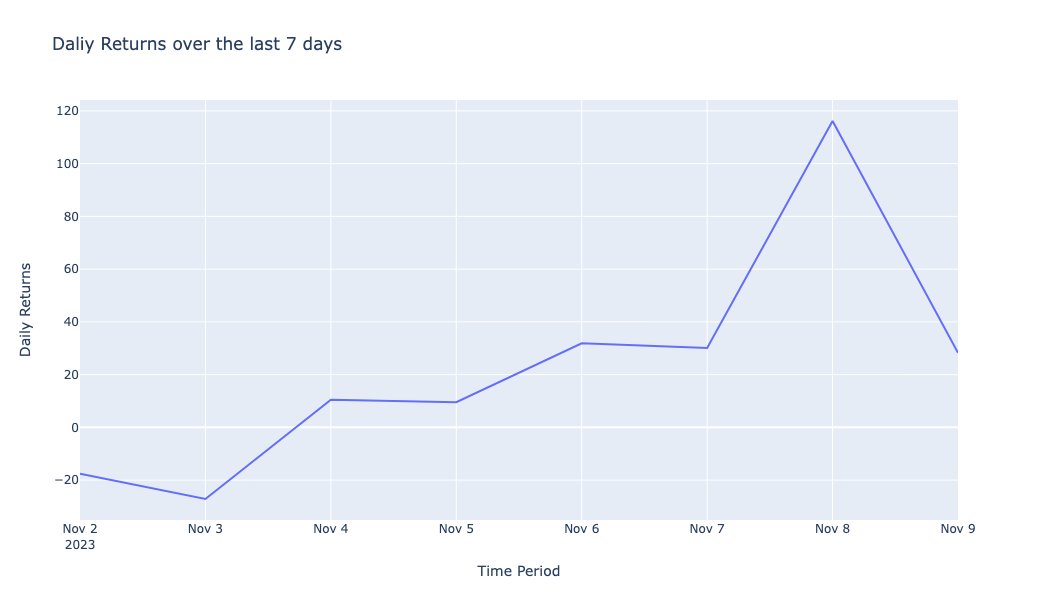

In [71]:
fig_freq = px.line(data_frame=df_date,
            x=df_date.index,
            y="DAILY_RETURN",
            title="Daliy Returns over the last 7 days"
            )
# Set axis labels
fig_freq.update_layout(xaxis_title="Time Period", yaxis_title="Daily Returns",height=600, width=800)

In [42]:
end_date = datetime.today()
start_date = roll_back_days(end_date,  5)
df_full = df_full[df_full['ACTIVITY_DATE'].between(start_date, end_date)]

In [43]:
df_full

,ACTIVITY_DATE,MEDIA_BUYER,CAMPAIGN,SPEND,REVENUE,DAILY_PROFIT,TOTAL_PROFIT,DAILY_RETURN,TOTAL_RETURN,LANDER_ARRIVALS,SERP_ARRIVALS,AD_CLICKS,ACCEPTED_CLICKS,ACCEPTANCE_RATE,SPEND_PER_ARRIVAL,REVENUE_PER_ARRIVAL,PROFIT_PER_ARRIVAL


In [44]:
len(df_full["CAMPAIGN"].unique().tolist())

0